In [77]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [78]:
adulttrain = pd.read_csv(r"D:\Users\dasarred\Desktop\adultincome\adulttrain.csv",names =  ["age", "workclass", "fnlwgt", "education", "education_num",
           "marital_status", "occupation", "relationship", "race", "gender",
           "capital_gain", "capital_loss", "hours_per_week", "native_country",
           "income_bracket"],sep = ',')

In [79]:
adulttrain.shape

(32561, 15)

In [80]:
adulttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income_bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [81]:
type(adulttrain)

pandas.core.frame.DataFrame

In [82]:
 traincorr = adulttrain.corr()

In [83]:
traincorr

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


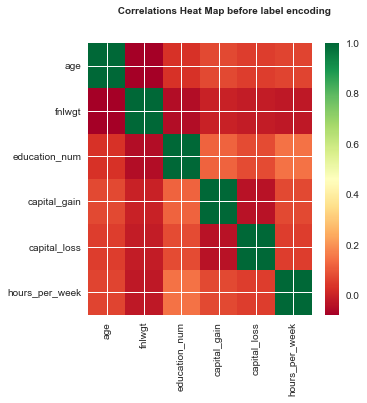

In [84]:
plt.figure(figsize=(5, 5))
plt.imshow(traincorr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(traincorr)), traincorr.columns, rotation='vertical')
plt.yticks(range(len(traincorr)), traincorr.columns);
plt.suptitle(' Correlations Heat Map before label encoding', fontsize=10, fontweight='bold')
plt.show()

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [87]:
adulttrainData = MultiColumnLabelEncoder(columns = [ 'workclass', 'education', 'marital_status', 'occupation', 
                                   'relationship', 'race', 'gender','native_country','income_bracket']).fit_transform(adulttrain)

In [88]:
adulttrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null int64
fnlwgt            32561 non-null int64
education         32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
occupation        32561 non-null int64
relationship      32561 non-null int64
race              32561 non-null int64
gender            32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null int64
income_bracket    32561 non-null int64
dtypes: int64(15)
memory usage: 3.7 MB


In [89]:
adulttrainDatacorr = adulttrainData.corr()

In [90]:
adulttrainDatacorr

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
gender,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


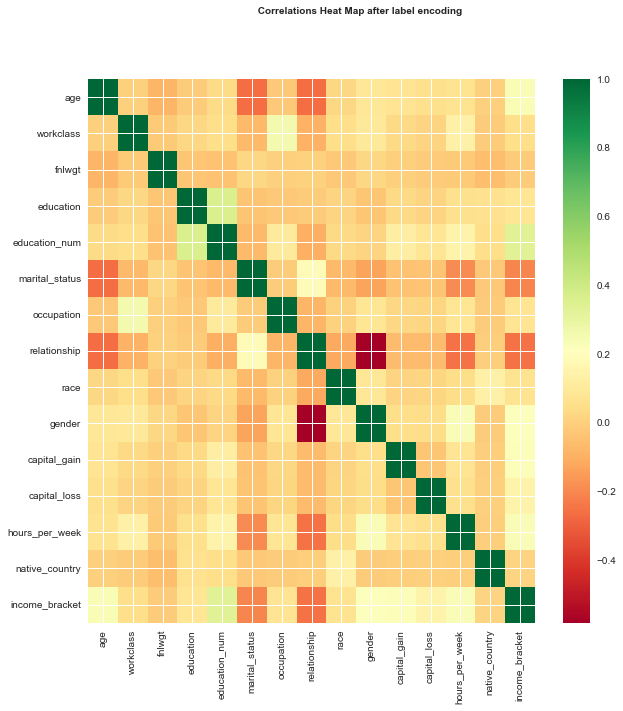

In [91]:
plt.figure(figsize=(10, 10))
plt.imshow(adulttrainDatacorr, cmap='RdYlGn', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(adulttrainDatacorr)), adulttrainDatacorr.columns, rotation='vertical')
plt.yticks(range(len(adulttrainDatacorr)), adulttrainDatacorr.columns);
plt.suptitle(' Correlations Heat Map after label encoding', fontsize=10, fontweight='bold')
plt.show()

In [92]:
adulttrainDatacorr['income_bracket']

age               0.234037
workclass         0.051604
fnlwgt           -0.009463
education         0.079317
education_num     0.335154
marital_status   -0.199307
occupation        0.075468
relationship     -0.250918
race              0.071846
gender            0.215980
capital_gain      0.223329
capital_loss      0.150526
hours_per_week    0.229689
native_country    0.015840
income_bracket    1.000000
Name: income_bracket, dtype: float64

In [93]:
np.abs(adulttrainDatacorr['income_bracket']).sort_values(ascending=False)

income_bracket    1.000000
education_num     0.335154
relationship      0.250918
age               0.234037
hours_per_week    0.229689
capital_gain      0.223329
gender            0.215980
marital_status    0.199307
capital_loss      0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native_country    0.015840
fnlwgt            0.009463
Name: income_bracket, dtype: float64

In [94]:
imp_columns = ['education_num','relationship','age','hours_per_week','capital_gain','gender','marital_status','capital_loss']

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix


In [96]:
inputData=adulttrainData.iloc[:,:14]
outputData=adulttrainData.iloc[:,14]

In [97]:
inputData.shape

(32561, 14)

In [98]:
outputData.shape

(32561,)

In [99]:
logistic=LogisticRegression()

In [100]:
logistic.fit(inputData,outputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
logistic.score(inputData,outputData)

0.79303461195909219

In [102]:
confusion_matrix(logistic.predict(inputData),outputData)

array([[23574,  5593],
       [ 1146,  2248]])

In [103]:
IMPinputData=adulttrainData.iloc[:,[0, 4, 5, 7, 9, 10, 11, 12] ]
IMPoutputData=adulttrainData.iloc[:,14] # see here how to take imp columsn s

In [104]:
IMPinputData.shape

(32561, 8)

In [105]:
IMPoutputData.shape

(32561,)

In [106]:
IMPinputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
age               32561 non-null int64
education_num     32561 non-null int64
marital_status    32561 non-null int64
relationship      32561 non-null int64
gender            32561 non-null int64
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
dtypes: int64(8)
memory usage: 2.0 MB


In [107]:
logisticIMPcolumns =LogisticRegression()

In [108]:
logisticIMPcolumns.fit(IMPinputData,IMPoutputData)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [109]:
logisticIMPcolumns.score(IMPinputData,IMPoutputData)

0.82494395135284548

In [110]:
confusion_matrix(logisticIMPcolumns.predict(IMPinputData),IMPoutputData)

array([[23335,  4315],
       [ 1385,  3526]])